# Heart Disease Analysis and Prediction 

### Import the data from CSV to data frame

In [121]:
# The code was removed by Watson Studio for sharing.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Check any null values in the columns

In [122]:
print("number of NaN values for the columns:\n", df.isnull().sum())


number of NaN values for the columns:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Extracted features and analyze data using different plots

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
Feature=df[['age','sex','oldpeak','fbs','cp','trestbps','chol','restecg','thalach','exang','slope','ca','thal']]
x=Feature
y=df[['target']]


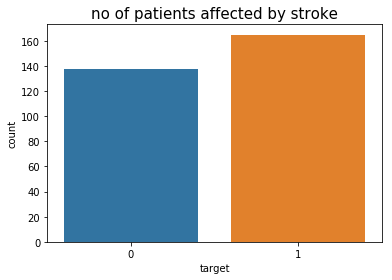

In [124]:
sns.countplot(x=y['target'])
plt.title("no of patients affected by stroke",fontsize=15)
plt.show()

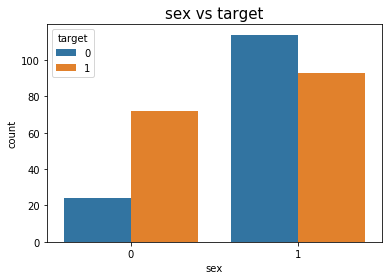

In [125]:
ax=sns.countplot(x=x['sex'],hue=y['target'])
plt.title("sex vs target",fontsize=15)
plt.show()
ax.set_xticklabels(['Female','Male']);

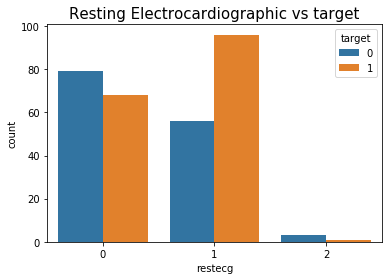

In [150]:
ax=sns.countplot(x=x['restecg'],hue=y['target'])
plt.title("Resting Electrocardiographic vs target",fontsize=15)
plt.show()


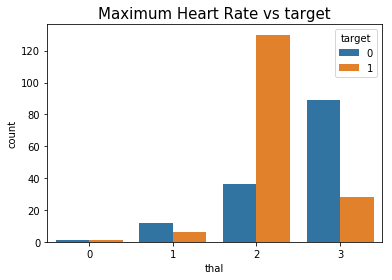

In [152]:
ax=sns.countplot(x=x['tre'],hue=y['target'])
plt.title("Maximum Heart Rate vs target",fontsize=15)
plt.show()


### Split data into train and test data. 

In [126]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


### Naive Bayes Classifier

In [127]:
from sklearn.naive_bayes import GaussianNB
model_NB=GaussianNB()
model_NB.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [128]:
y_predict_NB=model_NB.predict(x_test)
y_predict_NB

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1])

In [129]:
test_score=model_NB.score(x_test,y_test)
print("NBtest_score:",test_score)

NBtest_score: 0.8351648351648352


In [130]:
train_score=model_NB.score(x_train,y_train)
print("NBtrain_score:",train_score)

NBtrain_score: 0.8207547169811321


In [131]:
from sklearn.model_selection import cross_validate
cv_result_NB=cross_validate(model_NB,x_train,y_train,cv=5)
cv_result_NB

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

{'fit_time': array([0.00328588, 0.00256014, 0.00239253, 0.00221348, 0.00236273]),
 'score_time': array([0.00099134, 0.00087595, 0.00086689, 0.00087142, 0.00086761]),
 'test_score': array([0.88372093, 0.76744186, 0.85714286, 0.85714286, 0.69047619]),
 'train_score': array([0.81656805, 0.82840237, 0.82352941, 0.81176471, 0.86470588])}

In [132]:
conf_mat_NB=pd.crosstab(y_test.target,y_predict_NB)
conf_mat_NB

col_0,0,1
target,,
0,35,8
1,7,41


In [133]:
from sklearn.metrics import classification_report
report_NB=classification_report(y_test.target,y_predict_NB)
print(report_NB)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        43
           1       0.84      0.85      0.85        48

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



### Decision Tree Classfier

In [134]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model_DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [135]:
y_predict_DT=model_DT.predict(x_test)
y_predict_DT

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [136]:
from sklearn.metrics import auc,roc_auc_score,recall_score
score_DT=model_DT.score(x_test,y_test)
print("DT_TEST_Score:",score_DT)

DT_TEST_Score: 0.7582417582417582


In [137]:
conf_mat_DT=pd.crosstab(y_test.target,y_predict_DT)
conf_mat_DT

col_0,0,1
target,,
0,32,11
1,11,37


In [138]:
report_DT=classification_report(y_test,y_predict_DT)
print(report_DT)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        43
           1       0.77      0.77      0.77        48

   micro avg       0.76      0.76      0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



### MLP Classifer (Multi Layer Perception)

In [139]:
from sklearn.neural_network import MLPClassifier
model_MLP=MLPClassifier()
model_MLP.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
y_predict_MLP=model_MLP.predict(x_test)
y_predict_MLP

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0])

In [141]:
score_MLP=model_MLP.score(x_test,y_test)
print("MLP_test_score:",score_MLP)

MLP_test_score: 0.7362637362637363


In [142]:
score_MLP=model_MLP.score(x_train,y_train)
print("MLP_train_score:",score_MLP)

MLP_train_score: 0.7877358490566038


In [143]:
CV_Result_MLP=cross_validate(model_MLP,x_train,y_train.target,cv=5)
CV_Result_MLP

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

{'fit_time': array([0.15151215, 0.12195754, 0.1495893 , 0.12417126, 0.01557422]),
 'score_time': array([0.00189471, 0.00151205, 0.00139642, 0.00149536, 0.00125337]),
 'test_score': array([0.76744186, 0.76744186, 0.71428571, 0.88095238, 0.57142857]),
 'train_score': array([0.79881657, 0.82248521, 0.84117647, 0.81764706, 0.58235294])}

In [144]:
conf_mat_MLP=pd.crosstab(y_test.target,y_predict_MLP)
conf_mat_MLP

col_0,0,1
target,,
0,37,6
1,18,30


In [145]:
report_MLP=classification_report(y_test,predict_MLP)
print(report_MLP)

              precision    recall  f1-score   support

           0       0.55      0.49      0.52        43
           1       0.58      0.65      0.61        48

   micro avg       0.57      0.57      0.57        91
   macro avg       0.57      0.57      0.57        91
weighted avg       0.57      0.57      0.57        91



### Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=33, n_estimators=100)
model_RF.fit(x_train, y_train)
y_predict_RF = model_RF.predict(x_test)
y_predict_RF


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [147]:
test_score_RF=model_RF.score(x_test,y_test)
print("RFtest_score:",test_score_RF)

RFtest_score: 0.8351648351648352


In [148]:
conf_mat_RF=pd.crosstab(y_test.target,y_predict_RF)
conf_mat_RF

col_0,0,1
target,,
0,35,8
1,7,41


In [149]:
report_RF=classification_report(y_test,y_predict_RF)
print(report_RF)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        43
           1       0.84      0.85      0.85        48

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

